In [2]:
# import the packages we are going to be using

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import pandas as pd
#pd.set_option('display.max_columns', 100)
#import scipy.stats as stats

antro = "antropometria-dataset.csv"

# Importar los datos
df = pd.read_csv(antro)

df.head(10)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.700,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.650,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.800,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.400,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.950,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
5,241555,3,24,SAN LUIS POTOSI,1,10,7,31.900,1,141.45,...,20:12,1,20:19,1,M2435,5,3,1,588.463281,245
6,211879,2,21,PUEBLA,2,10,9,31.950,2,134.95,...,22:22,2,15:11,1,M2144,1,1,1,1879.750532,211
7,80135,3,8,CHIHUAHUA,2,11,9,32.400,1,136.60,...,18:32,3,18:32,1,M0804,7,1,1,589.164005,85
8,240207,4,24,SAN LUIS POTOSI,2,12,2,71.700,1,148.25,...,17:15,3,22:22,1,M2405,5,3,1,1122.094618,245
9,31220,3,3,BAJA CALIFORNIA SUR,1,10,10,48.025,1,147.05,...,17:09,2,17:09,1,M0331,5,3,1,138.063636,35


In [6]:
# Guardar los datos de las variables de interés
df.fillna(method ='ffill', inplace = True) 

#Revisar situacion de NaN
df.head(10)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.700,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.650,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.800,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.400,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.950,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
5,241555,3,24,SAN LUIS POTOSI,1,10,7,31.900,1,141.45,...,20:12,1,20:19,1,M2435,5,3,1,588.463281,245
6,211879,2,21,PUEBLA,2,10,9,31.950,2,134.95,...,22:22,2,15:11,1,M2144,1,1,1,1879.750532,211
7,80135,3,8,CHIHUAHUA,2,11,9,32.400,1,136.60,...,18:32,3,18:32,1,M0804,7,1,1,589.164005,85
8,240207,4,24,SAN LUIS POTOSI,2,12,2,71.700,1,148.25,...,17:15,3,22:22,1,M2405,5,3,1,1122.094618,245
9,31220,3,3,BAJA CALIFORNIA SUR,1,10,10,48.025,1,147.05,...,17:09,2,17:09,1,M0331,5,3,1,138.063636,35


In [3]:
df.dtypes

folio            int64
intp             int64
entidad          int64
desc_ent        object
sexo             int64
edad             int64
meses            int64
peso           float64
ropa             int64
talla          float64
emb             object
temb            object
cintura        float64
cadera         float64
sistol         float64
diastol        float64
hpresion        object
tbrazo          object
htension        object
PrimaryLast      int64
code_upm        object
est_dis          int64
est_urb          int64
est_marg         int64
pondef         float64
est_var          int64
dtype: object

In [4]:
#Guardar los datos de las variables de interes
sistol = df['sistol']
diastol = df['diastol']
peso = df['peso']
cintura = df['cintura']

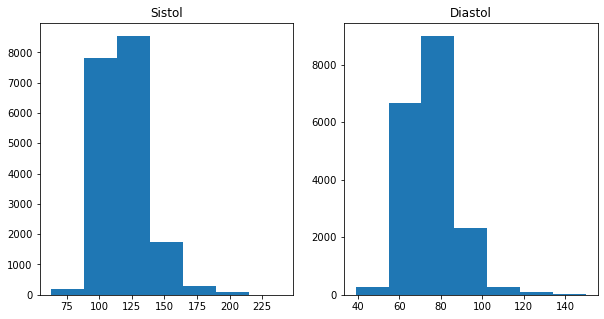

In [8]:
# Fijar el tamaño de las gráficas
plt.figure(figsize=(10,5))

# Visualizamos un histograma al lado del otro
#número de renglones, número de columnas, índice
plt.subplot(1,2,1)
plt.hist(x = sistol, bins = 10)
plt.title("Sistol")

plt.subplot(1,2,2)
plt.hist(x = diastol, bins = 10)
plt.title("Diastol")

#Busca los objetos gráfios activos y los muestra
plt.show()

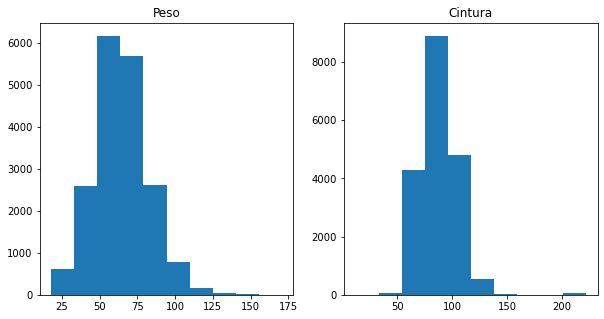

In [7]:
# Fijar el tamaño de las gráficas
plt.figure(figsize=(10,5))

# Visualizamos un histograma al lado del otro
#número de renglones, número de columnas, índice
plt.subplot(1,2,1)
plt.hist(x = peso, bins = 10)
plt.title("Peso")

plt.subplot(1,2,2)
plt.hist(x = cintura, bins = 10)
plt.title("Cintura")

#Busca los objetos gráfios activos y los muestra
plt.show()

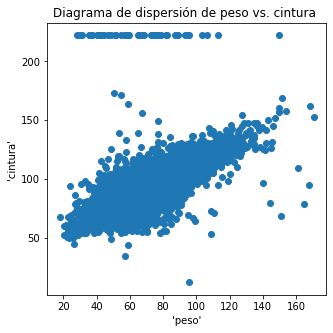

In [9]:
# Generar un diagrama de dispersión de peso vs. cintura
plt.figure(figsize=(5,5))
plt.scatter(x = peso, y = cintura)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs. cintura ")

plt.show()

In [22]:
#Separar datos de hombres y mujeres
hombres = df.loc[df['sexo']==1] 
mujeres = df.loc[df['sexo']==2]
pesohombres = hombres['peso']
cinturahombres = hombres['cintura']
pesomujeres = mujeres['peso']
cinturamujeres = mujeres['cintura']

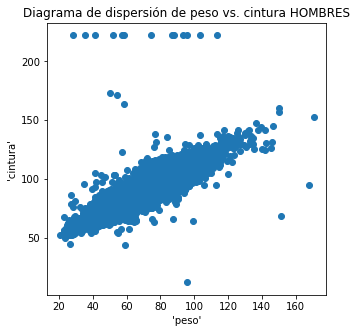

In [18]:
# Generar un diagrama de dispersión de peso vs. cintura
plt.figure(figsize=(5,5))
plt.scatter(x = pesohombres, y = cinturahombres)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs. cintura HOMBRES")

plt.show()

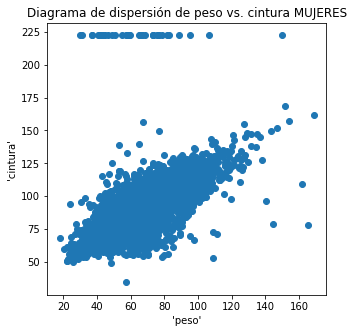

In [23]:
# Generar un diagrama de dispersión de peso vs. cintura
plt.figure(figsize=(5,5))
plt.scatter(x = pesomujeres, y = cinturamujeres)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs. cintura MUJERES")

plt.show()